# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [176]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [55]:
medical.shape

(1338, 8)

In [57]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Mean of charges: This represents the average cost of medical charges across all individuals in the dataset.

Standard deviation of charges: This measures the variability of the charges around the mean.

Based on the calculation, 
Mean Charges: 13270.422265141257

And

STD charges : 12110.011236694001

While the mean and standard deviation provide useful information, they are not the best statistics for skewed data.
A boxplot or median and IQR would be better alternatives to summarize this dataset effectively.

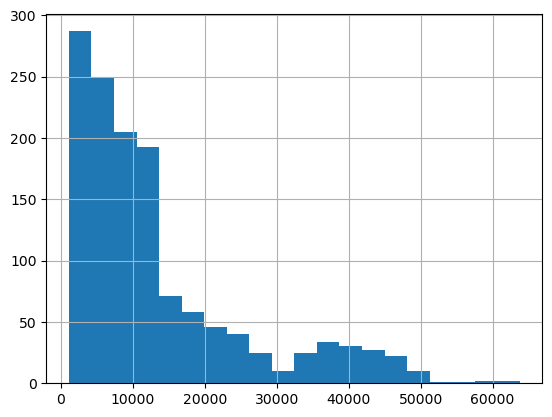

In [131]:
_ = medical['charges'].hist(bins=20)

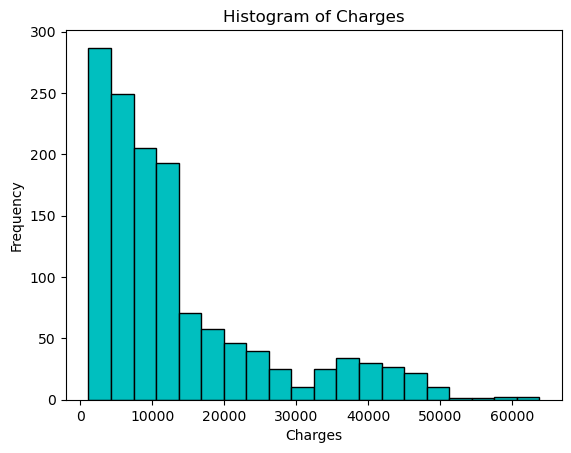

In [133]:
# Plot histogram of the 'charges' column
plt.hist(medical['charges'], bins=20, color='c', edgecolor='k')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Charges")
plt.show()


In [135]:
# Calculate mean and standard deviation for 'charges' column
n = statistics.mean(medical['charges'])
sd = statistics.stdev(medical['charges'])

print('Mean Charges:', n)
print('STD charges :', sd)

Mean Charges: 13270.422265141257
STD charges : 12110.011236694001


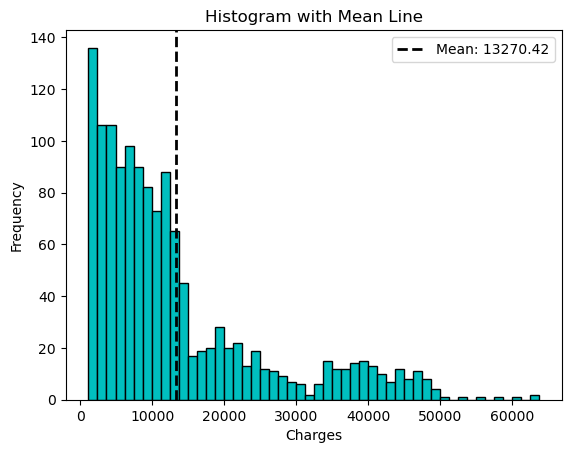

In [137]:
# Calculate mean and standard deviation for 'charges' column
n = statistics.mean(medical['charges'])
sd = statistics.stdev(medical['charges'])

# Plot histogram again with a vertical line for mean
plt.hist(medical['charges'], bins=50, color='c', edgecolor='k')

plt.axvline(n, color='k', linestyle='dashed', linewidth=2, label=f"Mean: {n:.2f}")

plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram with Mean Line")
plt.legend()
plt.show()

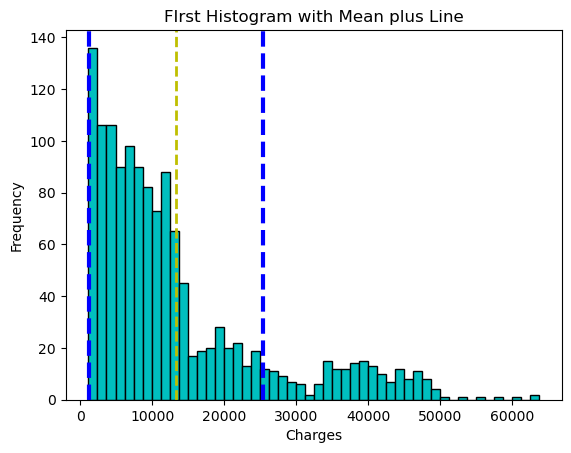

In [139]:
# Plot histogram again with a vertical line for mean
plt.hist(medical['charges'], bins=50, color='c', edgecolor='k')

plt.axvline(n, color='y', linestyle='dashed', linewidth=2)

plt.axvline(n + sd, color='blue', linestyle='dashed', linewidth=3)
plt.axvline(n - sd, color = 'blue', linestyle='dashed', linewidth=3)

plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("FIrst Histogram with Mean plus Line")
#plt.legend()
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The dataset represents a random sample of medical charges, which allows us to make inferences about the population.

Based on the calculation, the sample Mean Charges is: 13270.422265141257
And STD charges is: 12110.011236694001

Since we are interested in whether the true average charge has fallen below $12,000, we can use hypothesis testing to assess this claim.

Given that we have a single sample and are testing a hypothesis about the population mean, the appropriate test is the one-sample t-test.

The one-sample t-test is the most appropriate frequentist test.

We would compute the t-statistic and corresponding p-value.

If the p-value is small (e.g., 𝑝 < 0.05 p<0.05), we reject 𝐻0H0​
  and conclude that the average charge has fallen below $12,000.

If the p-value is large, we fail to reject 𝐻0H0​  , meaning there is not enough evidence to claim the average charge is below $12,000.



__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Based on the calculation, Critical t-value is: 1.6459941145571317
And Lower bound of 95% confidence interval: 12725.48718381623.

The administrator should not be concern as the confidence interval predicts that in 95% of cases the average charge will be above $12,000.

In [142]:
# Load the dataset
file_path = "insurance2.csv"  # Update this path if needed
medical = pd.read_csv(file_path)

# Extract the 'charges' column
charges = medical['charges']

# Calculate sample statistics
n = len(charges)  # Sample size
mean_charges = np.mean(charges)  # Sample mean
std_charges = np.std(charges, ddof=1)  # Sample standard deviation


In [146]:

# Define confidence level
confidence_level = 0.95

# Calculate the critical t-value for a one-sided confidence interval
alpha = 1 - confidence_level  # Significance level for one-sided CI
t_critical = t.ppf(1 - alpha, df=n-1)  # One-tailed critical value


In [148]:

# Compute the margin of error for one-sided confidence interval
margin_of_error = t_critical * (std_charges / np.sqrt(n))

# Compute the lower bound of the confidence interval (one-sided)
lower_bound = mean_charges - margin_of_error

# Display results
print(f"Critical t-value: {t_critical}")
print(f"Lower bound of 95% confidence interval: {lower_bound}")

Critical t-value: 1.6459941145571317
Lower bound of 95% confidence interval: 12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Number of insured: 783, Number of uninsured: 555.

Pooled standard deviation: 11520.034268775256
t-statistic: 11.893299030876715
Degrees of freedom: 1336
P-value: 0.0

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in the charges between the insured and uninsured groups.

This suggests that individuals with insurance are charged significantly different amounts than those without insurance.

In [167]:
# find out columns name to get insured data column 
print(medical.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


In [169]:
# Split data into insured and uninsured groups based on 'insuranceclaim'
insured = medical['charges'][medical['insuranceclaim'] == 1]  # 1 indicates insured
uninsured = medical['charges'][medical['insuranceclaim'] == 0]  # 0 indicates uninsured

# Calculate sample sizes
n0 = len(insured)
n1 = len(uninsured)

print(f"Number of insured: {n0}, Number of uninsured: {n1}")


Number of insured: 783, Number of uninsured: 555


In [171]:


# Calculate sample means
x0_bar = np.mean(insured)
x1_bar = np.mean(uninsured)

# Calculate sample standard deviations
s0 = np.std(insured, ddof=1)
s1 = np.std(uninsured, ddof=1)

# Calculate pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# Calculate t-statistic
t_stat = (x0_bar - x1_bar) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# Compute two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Display results
print(f"Pooled standard deviation: {sp}")
print(f"t-statistic: {t_stat}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in charges between insured and uninsured individuals.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in charges between insured and uninsured individuals.")


Pooled standard deviation: 11520.034268775256
t-statistic: 11.893299030876715
Degrees of freedom: 1336
P-value: 0.0
We reject the null hypothesis: There is a significant difference in charges between insured and uninsured individuals.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manual Approach:
Pooled standard deviation: 11520.034268775256
t-statistic: 11.893299030876715
Degrees of freedom: 1336
P-value: 0.0

Scipy Approach:
t-statistic: 11.893299030876712
P-value: 4.461230231620717e-31

The results from both methods are the same!

In [181]:

# Assuming we already have the insured and uninsured groups (charges for both)
# insured = medical['charges'][medical['insuranceclaim'] == 1]  # 1 indicates insured
# uninsured = medical['charges'][medical['insuranceclaim'] == 0]  # 0 indicates uninsured

# Sample sizes
n0 = len(insured)
n1 = len(uninsured)

# Sample means
x0_bar = np.mean(insured)
x1_bar = np.mean(uninsured)

# Sample standard deviations
s0 = np.std(insured, ddof=1)
s1 = np.std(uninsured, ddof=1)

# Pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))


In [183]:

# t-statistic
t_stat = (x0_bar - x1_bar) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# p-value using the t-distribution (two-tailed test)
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Print manual results
print(f"Manual Approach:")
print(f"Pooled standard deviation: {sp}")
print(f"t-statistic: {t_stat}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value_manual}")

# Now using scipy.stats.ttest_ind() for comparison
t_stat_scipy, p_value_scipy = stats.ttest_ind(insured, uninsured, equal_var=True)

# Print scipy results
print("\nScipy Approach:")
print(f"t-statistic: {t_stat_scipy}")
print(f"P-value: {p_value_scipy}")

# Compare results
if np.isclose(t_stat, t_stat_scipy) and np.isclose(p_value_manual, p_value_scipy):
    print("\nThe results from both methods are the same!")
else:
    print("\nThe results from both methods are different.")


Manual Approach:
Pooled standard deviation: 11520.034268775256
t-statistic: 11.893299030876715
Degrees of freedom: 1336
P-value: 0.0

Scipy Approach:
t-statistic: 11.893299030876712
P-value: 4.461230231620717e-31

The results from both methods are the same!


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
z-statistic is : 2.7386127875258306
and 

P-value is : 0.0061698993205441255

The t-test is more commonly used in practice due to its robustness in cases where the population variance is unknown and because it works well for smaller sample sizes. For large sample sizes, the t-distribution approximates the z-distribution, making the two tests similar in their results.

In [188]:
from scipy.stats import norm

# Example values
sample_mean = 50
population_mean = 45
population_std = 10  # Population standard deviation (if known)
sample_size = 30

# Calculate z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"z-statistic: {z_stat}")
print(f"P-value: {p_value}")


z-statistic: 2.7386127875258306
P-value: 0.0061698993205441255


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test